In [1]:
import numpy as np
import matplotlib.pyplot as plt

from simnn import Model
from simnn import Linear
from simnn import ReLU, Softmax, Logistic_Sigmoid
from simnn import CrossEntropy
from simnn.utils import one_hot

from dataset.mnist.mnist import load_mnist_data
from dataset.utils import *

In [2]:
# Extract data
((X_train, Y_train), (X_test, Y_test)) = load_mnist_data('dataset/mnist/')

[X_train, X_test] = d_range([X_train, X_test])  # put data values \in [-1, 1]

# create training / validatin data split
((X_train, Y_train), (X_val, Y_val)) = train_val_split((X_train, Y_train), 1 / 6)

t_train = one_hot(Y_train, m=10)
t_test = one_hot(Y_test, m=10)
t_val = one_hot(Y_val, m=10)

dataset = (X_train, t_train)
val_set = (X_val, t_val)
test_set = (X_test, t_test)

In [3]:
# define model structure
layers = [Linear(out_shape=64, activation=ReLU(), bias=True, init='lecun_normal'),
          Linear(out_shape=10, activation=Softmax(), bias=True, init='lecun_normal')]

# instantiate model
model = Model(layers, dataset, CrossEntropy(), class_task=True)

In [4]:
# fit model to datas
model.fit(dataset, num_epochs=50, val_set=val_set, b_size=128, shuffle=True,
          initial_learn=1e-3, aneal_T=30, verbose=True)

/Users/vchiley/SIMNN/simnn/model.py:143: UserWarning: Training set not split equally by b_size
  warnings.warn('Training set not split equally by b_size')


Epoch: 49, time: 63.76s, with train cost 0.03636, Train Acc 0.9901, Val Acc 0.9661

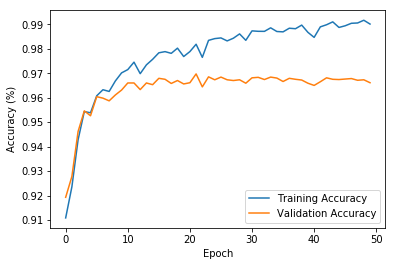

Final Training Accuracy Rate: 0.99006%
Final Validation Accuracy Rate: 0.9661%


In [5]:
# plot Accuracies
plt.plot(model.acc_e, label='Training Accuracy')
plt.plot(model.v_acc_e, label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.show()
print("Final Training Accuracy Rate: {:.5}%".format(model.acc_e[-1]))
print("Final Validation Accuracy Rate: {:.5}%".format(model.v_acc_e[-1]))

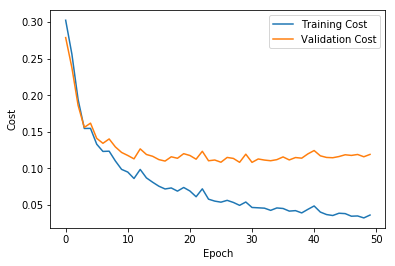

Final Training Cost: 0.036365
Final Validation Cost: 0.11918


In [6]:
# plot costs
plt.plot(model.cost_e, label='Training Cost')
plt.plot(model.v_cost_e, label='Validation Cost')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()
print("Final Training Cost: {:.5}".format(model.cost_e[-1]))
print("Final Validation Cost: {:.5}".format(model.v_cost_e[-1]))